In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and prepare the dataset
df = pd.read_csv("data/vehicules_in_circulation.csv")
df['ds'] = pd.to_datetime(df['year'], format="%Y")

In [73]:
# -----------------------------
# 1. ELECTRIC VEHICLES (EV)
# -----------------------------
X_ev = df[['year']]
y_ev = df['electrical']

# Polynomial features (degree 4)
poly4_ev = PolynomialFeatures(degree=4)
X_poly4_ev = poly4_ev.fit_transform(X_ev)
model_poly4_ev = LinearRegression()
model_poly4_ev.fit(X_poly4_ev, y_ev)

# Predict (fit) on historical data
y_fit_ev = model_poly4_ev.predict(X_poly4_ev)

# Forecast for next 25 years
last_year = df['year'].max()
print(f"Last year in dataset: {last_year}")
future_years = np.arange(last_year + 1, last_year + 27).reshape(-1, 1)
print(f"Forecasting for years: {future_years.flatten()}")
X_future_poly4_ev = poly4_ev.transform(future_years)
y_forecast_ev = model_poly4_ev.predict(X_future_poly4_ev)

# Combine predictions
years_all = np.concatenate([X_ev['year'], future_years.flatten()])
dates_all = pd.to_datetime(years_all, format="%Y")
y_ev_all = np.concatenate([y_fit_ev, y_forecast_ev])

#concatenate real and forecasted data
ev_full = np.concatenate([y_ev, y_forecast_ev])

Last year in dataset: 2024
Forecasting for years: [2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038
 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050]


/Users/gallouche/miniconda3/envs/PI_ExplAI/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [74]:
# -----------------------------
# 2. TOTAL VEHICLES
# -----------------------------
X_total = df[['year']]
y_total = df['all']

poly4_total = PolynomialFeatures(degree=4)
X_poly4_total = poly4_total.fit_transform(X_total)
model_poly4_total = LinearRegression()
model_poly4_total.fit(X_poly4_total, y_total)

# Predict (fit) on historical data
y_fit_total = model_poly4_total.predict(X_poly4_total)

# Forecast for next 10 years
X_future_poly4_total = poly4_total.transform(future_years)
y_forecast_total = model_poly4_total.predict(X_future_poly4_total)

# Combine predictions
y_total_all = np.concatenate([y_fit_total, y_forecast_total])

total_all_full = np.concatenate([y_total, y_forecast_total])

/Users/gallouche/miniconda3/envs/PI_ExplAI/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [75]:
# -----------------------------
# 3. EV SHARE (%)
# -----------------------------
ev_share_pct = (ev_full / total_all_full)
print(f"EV Share: {ev_share_pct}")

EV Share: [0.00184558 0.00221253 0.00230784 0.00233292 0.00228422 0.00221116
 0.00216413 0.00214571 0.00212937 0.00214877 0.00213018 0.00207684
 0.00207633 0.00204855 0.00182066 0.00175894 0.00171239 0.00168685
 0.0017466  0.00193537 0.00232099 0.00309756 0.0041927  0.00503056
 0.00596234 0.00716087 0.00821415 0.00947142 0.01114257 0.01449869
 0.01928741 0.02840921 0.04131562 0.0554344  0.07007729 0.06828013
 0.07873065 0.09010221 0.10243761 0.11578247 0.13018573 0.14569993
 0.16238175 0.18029248 0.19949852 0.22007207 0.24209177 0.26564345
 0.29082109 0.31772771 0.34647659 0.37719251 0.41001331 0.44509154
 0.48259657 0.52271682 0.56566258 0.61166921 0.66100091 0.71395527
 0.77086866]


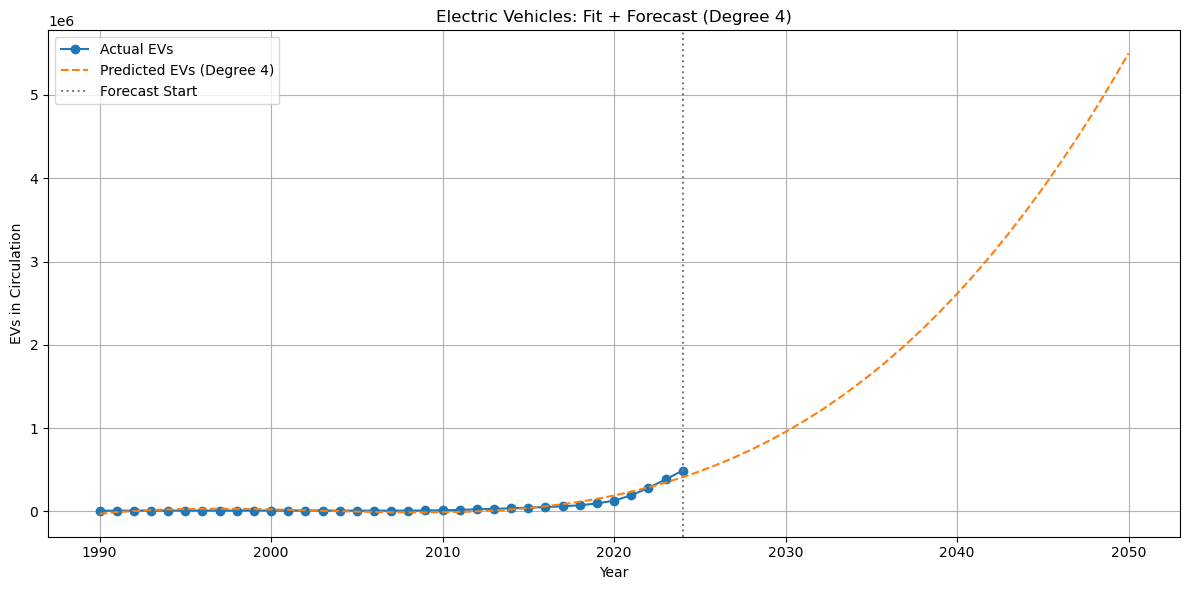

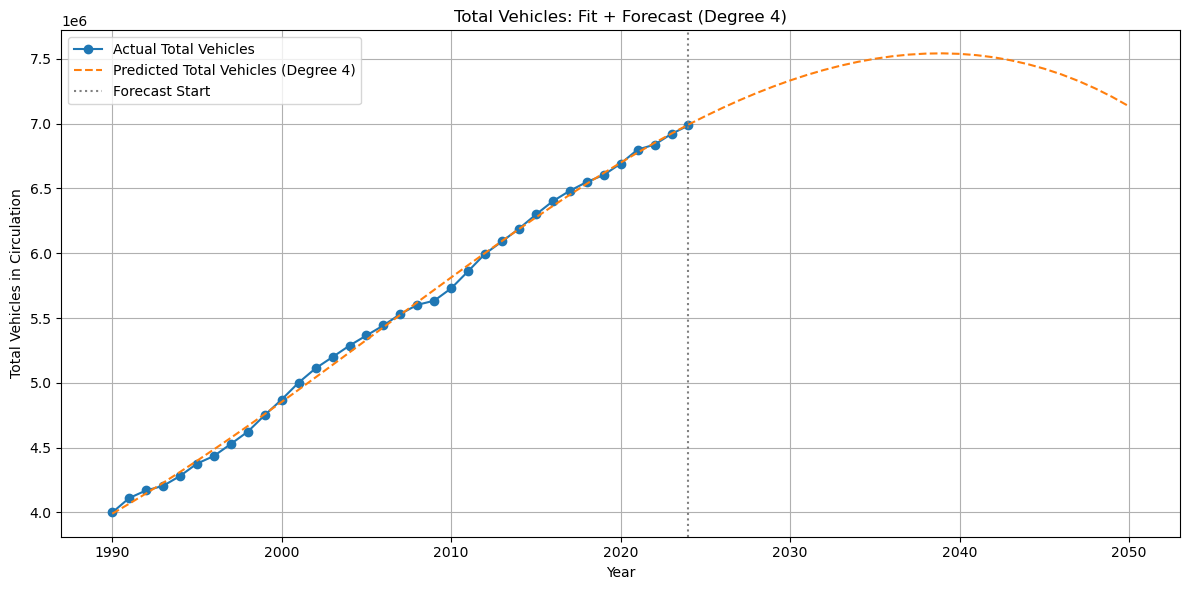

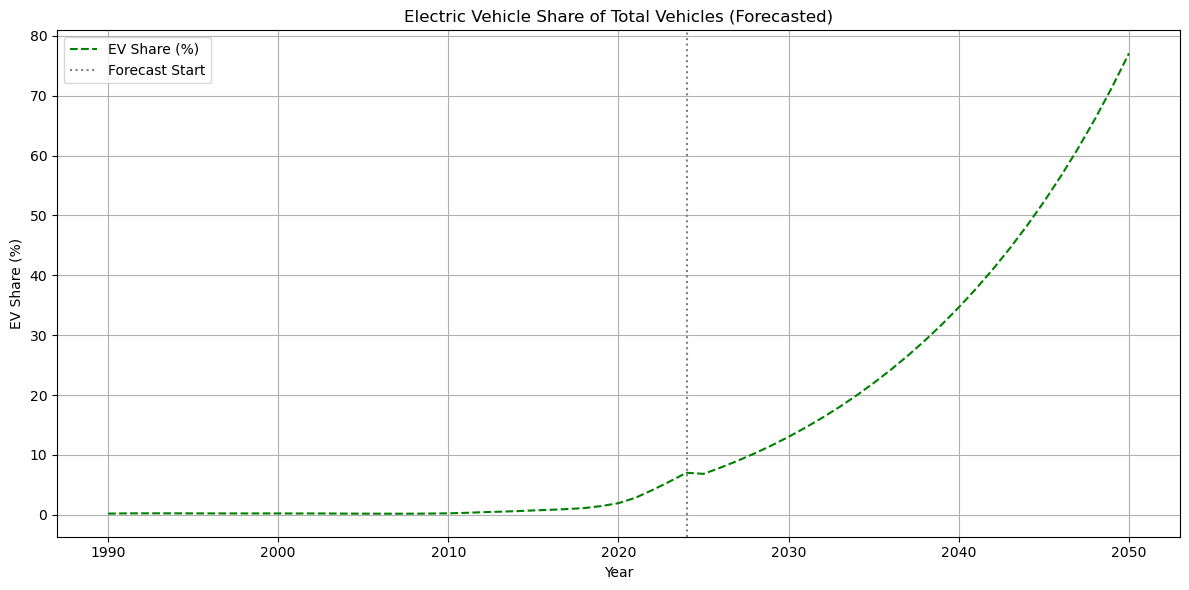

In [76]:
# -----------------------------
# 4. PLOTTING
# -----------------------------
# Electric Vehicle count
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], y_ev, label='Actual EVs', marker='o')
plt.plot(dates_all, y_ev_all, label='Predicted EVs (Degree 4)', linestyle='--')
plt.axvline(pd.to_datetime(str(last_year)), color='gray', linestyle=':', label='Forecast Start')
plt.title('Electric Vehicles: Fit + Forecast (Degree 4)')
plt.xlabel('Year')
plt.ylabel('EVs in Circulation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Total Vehicle count
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], y_total, label='Actual Total Vehicles', marker='o')
plt.plot(dates_all, y_total_all, label='Predicted Total Vehicles (Degree 4)', linestyle='--')
plt.axvline(pd.to_datetime(str(last_year)), color='gray', linestyle=':', label='Forecast Start')
plt.title('Total Vehicles: Fit + Forecast (Degree 4)')
plt.xlabel('Year')
plt.ylabel('Total Vehicles in Circulation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# EV Share Percentage
plt.figure(figsize=(12, 6))
plt.plot(dates_all, ev_share_pct * 100, label='EV Share (%)', linestyle='--', color='green')
plt.axvline(pd.to_datetime(str(last_year)), color='gray', linestyle=':', label='Forecast Start')
plt.title('Electric Vehicle Share of Total Vehicles (Forecasted)')
plt.xlabel('Year')
plt.ylabel('EV Share (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [77]:
# -----------------------------
# 5. ERRORS ON HISTORICAL FIT
# -----------------------------
mse_ev = mean_squared_error(y_ev, y_fit_ev)
mae_ev = mean_absolute_error(y_ev, y_fit_ev)
mse_total = mean_squared_error(y_total, y_fit_total)
mae_total = mean_absolute_error(y_total, y_fit_total)

print(f"EV Model - MSE: {mse_ev:.2f}, MAE: {mae_ev:.2f}")
print(f"Total Vehicle Model - MSE: {mse_total:.2f}, MAE: {mae_total:.2f}")


EV Model - MSE: 783947264.28, MAE: 22246.71
Total Vehicle Model - MSE: 1376162017.18, MAE: 29518.24


In [78]:
# save the forecasted data to CSV
forecast_df = pd.DataFrame({
    'year': years_all,
    'ev_count': ev_full,
    'total_count': total_all_full,
    'ev_share_pct': ev_share_pct
})
forecast_df.to_csv("prediction/forecasted_vehicles.csv", index=False)
# Save the models